   ## The Hospital Emergency Room (ER) Data Analytics Project  

### Introduction


This project is a Descriptive Analytics of a Hospital ER data containing patients’ demographics, wait time, department referrals, other patient care, as well as satisfaction score given by the patients. It tells the data story by identifying trends, engineering features, and correlating factors to answer questions and present actionable insights through clear visualizations and summaries.


Questions asked and answered. 
1.	How do wait times vary by department and age group?
2.	Are patients with higher wait times less likely to report satisfaction?
3.	Which demographic is most frequently referred to specific departments?

Additional Question 

4.	 What are the busiest periods in the ER?


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv("Hospital ER_Data 2.csv")
df.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM
0,145-39-5406,20/03/2024 08:47,H,Glasspool,M,69,White,None,False,10.0,39,0
1,316-34-3057,15/06/2024 11:29,X,Methuen,M,4,Native American/Alaska Native,None,True,NaN,27,0
2,897-46-3852,20/06/2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0
3,358-31-9711,04/02/2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0
4,289-26-0537,04/09/2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,NaN,10,0


In [3]:
df.columns

Index(['Patient Id', 'Patient Admission Date', 'Patient First Inital',
       'Patient Last Name', 'Patient Gender', 'Patient Age', 'Patient Race',
       'Department Referral', 'Patient Admission Flag',
       'Patient Satisfaction Score', 'Patient Waittime', 'Patients CM'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Patient Id                  9216 non-null   object 
 1   Patient Admission Date      9216 non-null   object 
 2   Patient First Inital        9216 non-null   object 
 3   Patient Last Name           9216 non-null   object 
 4   Patient Gender              9216 non-null   object 
 5   Patient Age                 9216 non-null   int64  
 6   Patient Race                9216 non-null   object 
 7   Department Referral         9216 non-null   object 
 8   Patient Admission Flag      9216 non-null   bool   
 9   Patient Satisfaction Score  2517 non-null   float64
 10  Patient Waittime            9216 non-null   int64  
 11  Patients CM                 9216 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 801.1+ KB


## Data Cleaning

In [5]:
#checking for duplicate entries

df.duplicated().sum()

0

In [6]:
#checcking for missing values

df.isnull().sum() 

Patient Id                       0
Patient Admission Date           0
Patient First Inital             0
Patient Last Name                0
Patient Gender                   0
Patient Age                      0
Patient Race                     0
Department Referral              0
Patient Admission Flag           0
Patient Satisfaction Score    6699
Patient Waittime                 0
Patients CM                      0
dtype: int64

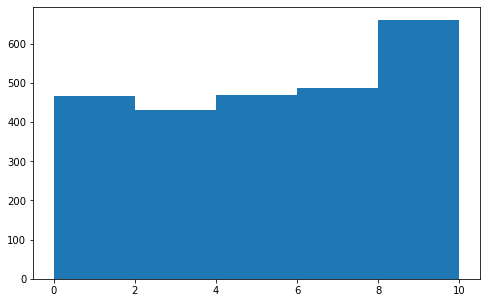

In [7]:
plt.figure(figsize=(8, 5))
plt.hist(df["Patient Satisfaction Score"], bins=5)
plt.show()

In [8]:
df["Patient Satisfaction Score"].describe()

count    2517.000000
mean        4.992054
std         3.138043
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        10.000000
Name: Patient Satisfaction Score, dtype: float64

In [9]:
#filling null values with previous value

df["Patient Satisfaction Score"] = df["Patient Satisfaction Score"].fillna(method = "pad")
df.isna().sum()

Patient Id                    0
Patient Admission Date        0
Patient First Inital          0
Patient Last Name             0
Patient Gender                0
Patient Age                   0
Patient Race                  0
Department Referral           0
Patient Admission Flag        0
Patient Satisfaction Score    0
Patient Waittime              0
Patients CM                   0
dtype: int64

## Exploratory Data Analysis EDA
#### Categorical Data

M: 51.05%
F: 48.69%
NC: 0.26%


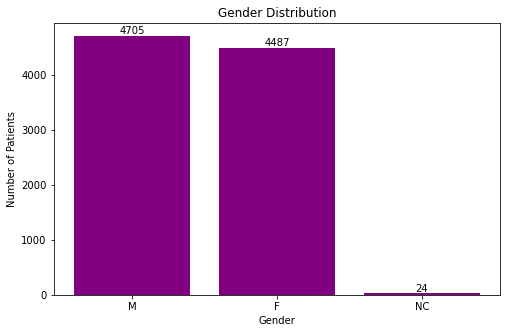

In [10]:
# analysing gender 

gender = df["Patient Gender"].value_counts()

for g, v in gender.items(): 
    percnt = round(v / len(df) * 100, 2)
    
    print(g + ": " + str(percnt) + "%")
    

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(gender.index, gender.values, color="purple")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")
plt.title("Gender Distribution")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom")


plt.show()

White: 28%
African American: 21%
Two or More Races: 17%
Asian: 12%
Declined to Identify: 11%
Pacific Islander: 6%
Native American/Alaska Native: 5%


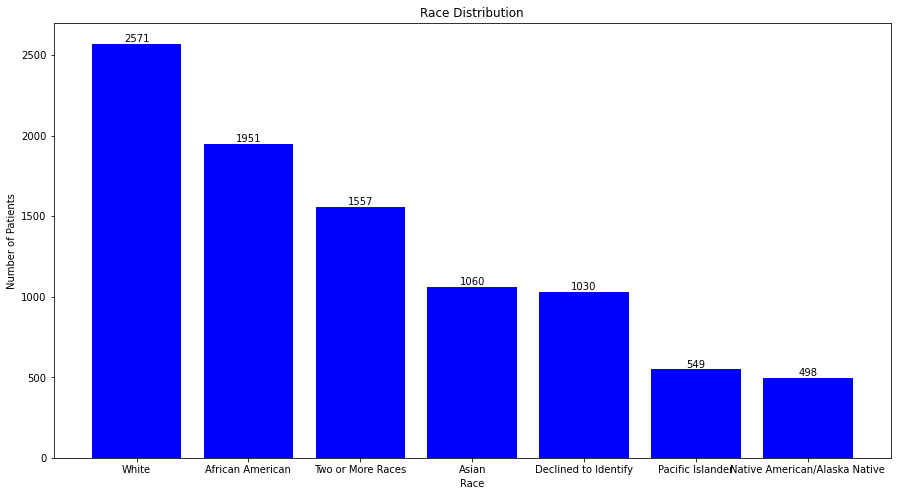

In [11]:
# analysing race

race = df["Patient Race"].value_counts()

for r, v in race.items():
    percnt = round(v / len(df) * 100)
    
    print(r + ": " + str(percnt) + "%")

# Plotting
plt.figure(figsize=(15, 8))
bars = plt.bar(race.index, race.values, color="blue")
plt.xlabel("Race")
plt.ylabel("Number of Patients")
plt.title("Race Distribution")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom")


plt.show()

In [12]:
df["Department Referral"].unique()

array(['None', 'General Practice', 'Orthopedics', 'Gastroenterology',
       'Physiotherapy', 'Neurology', 'Cardiology', 'Renal'], dtype=object)

None: 59%
General Practice: 20%
Orthopedics: 11%
Physiotherapy: 3%
Cardiology: 3%
Neurology: 2%
Gastroenterology: 2%
Renal: 1%


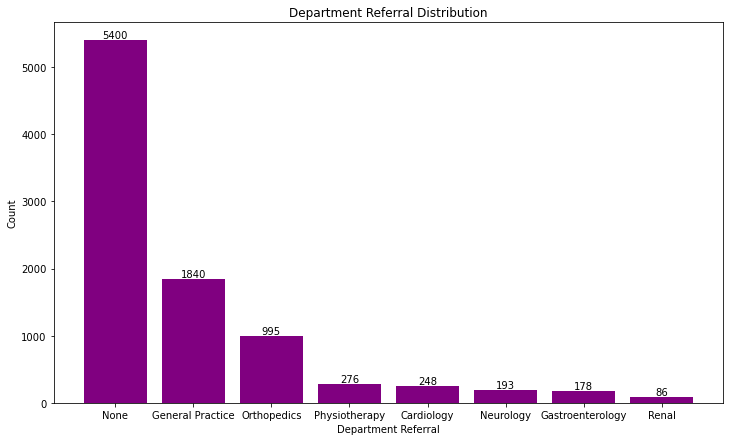

In [13]:
#Department Referral, 


dept_ref= df["Department Referral"].value_counts()

for d, v in dept_ref.items():
    percnt = round(v / len(df) * 100)
    
    print(d + ": " + str(percnt) + "%")

# Plotting
plt.figure(figsize=(12, 7))
bars = plt.bar(dept_ref.index, dept_ref.values, color="purple")
plt.xlabel("Department Referral")
plt.ylabel("Count")
plt.title("Department Referral Distribution")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom")


plt.show()

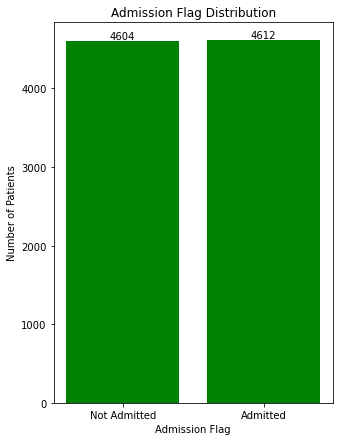

In [14]:

#Patient Admission Flag

admission= df["Patient Admission Flag"].value_counts()


# Plotting
plt.figure(figsize=(5, 7))
bars = plt.bar(admission.index, admission.values, color="green")
plt.xticks([0, 1], ["Not Admitted", "Admitted"])
plt.xlabel("Admission Flag")
plt.ylabel("Number of Patients")
plt.title("Admission Flag Distribution")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom")


plt.show()

### Numeric Data

In [15]:
# statistics of numeric data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient Age,9216.0,39.855143,22.755125,1.0,20.0,39.0,60.0,79.0
Patient Satisfaction Score,9216.0,6.727214,3.270915,0.0,4.0,8.0,10.0,10.0
Patient Waittime,9216.0,35.259874,14.735323,10.0,23.0,35.0,48.0,60.0
Patients CM,9216.0,0.052083,0.222207,0.0,0.0,0.0,0.0,1.0


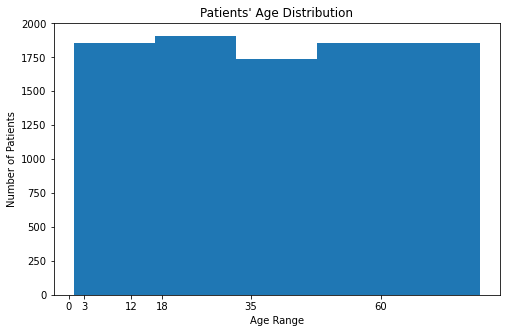

In [16]:
# Patient Age

plt.figure(figsize=(8, 5))
plt.hist(df["Patient Age"], bins=5)
plt.xticks([0, 3, 12, 18, 35, 60])
plt.xlabel("Age Range")
plt.ylabel("Number of Patients")
plt.title("Patients' Age Distribution")
plt.show()

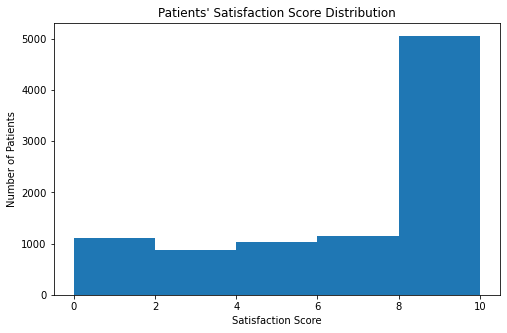

In [17]:
#Plotting the Patient Satisfaction Score histogram distribution 

plt.figure(figsize=(8, 5))
plt.hist(df["Patient Satisfaction Score"], bins=5)
plt.xlabel("Satisfaction Score")
plt.ylabel("Number of Patients")
plt.title("Patients' Satisfaction Score Distribution")
plt.show()

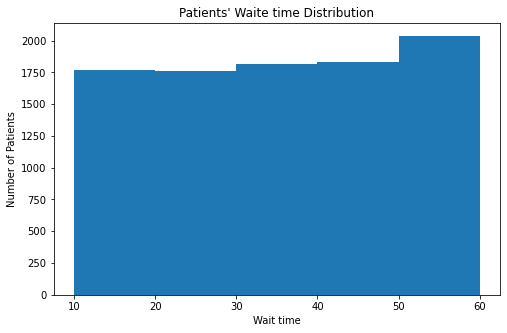

In [18]:
#Plotting the Patient wait time histogram distribution

plt.figure(figsize=(8, 5))
plt.hist(df["Patient Waittime"], bins=5)
plt.xlabel("Wait time")
plt.ylabel("Number of Patients")
plt.title("Patients' Waite time Distribution")
plt.show()

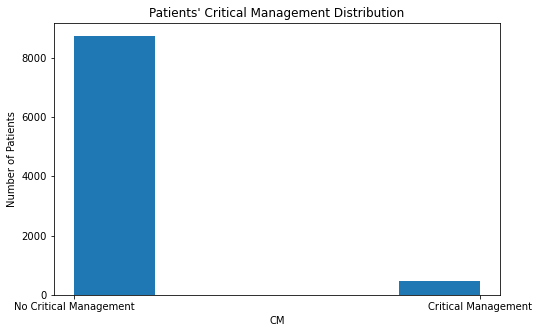

In [19]:
#Plotting the Patient Critical Management histogram distribution
plt.figure(figsize=(8, 5))
plt.hist(df["Patients CM"], bins=5)
plt.xticks([0, 1], ['No Critical Management', 'Critical Management'])
plt.xlabel("CM")
plt.ylabel("Number of Patients")
plt.title("Patients' Critical Management Distribution")
plt.show()

In [20]:
cm = df["Patients CM"].value_counts()
cm

0    8736
1     480
Name: Patients CM, dtype: int64

## Feature Engineering 

In [21]:
#Grouping ages into 'Child', 'Teen', 'Young Adult', 'Adult', and 'Senior'

Age_Group = []

for age in df["Patient Age"]:
    if age < 3:
        group = "Infant"
    elif age < 13:
        group = "Child"
    elif age < 20:
        group = "Teenager"
    elif age < 36:
        group = "Young Adult"
    elif age < 56:
        group = "Adult"
    else:
        group = "Senior"
    
    Age_Group.append(group)
    
    
df["Patient Agegroup"] = Age_Group
df.head()


,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM,Patient Agegroup
0,145-39-5406,20/03/2024 08:47,H,Glasspool,M,69,White,None,False,10.0,39,0,Senior
1,316-34-3057,15/06/2024 11:29,X,Methuen,M,4,Native American/Alaska Native,None,True,10.0,27,0,Child
2,897-46-3852,20/06/2024 09:13,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0,Senior
3,358-31-9711,04/02/2024 22:34,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0,Young Adult
4,289-26-0537,04/09/2024 17:48,Y,Gionettitti,M,5,African American,Orthopedics,False,8.0,10,0,Child


Senior: 30%
Adult: 25%
Young Adult: 20%
Child: 13%
Teenager: 9%
Infant: 2%


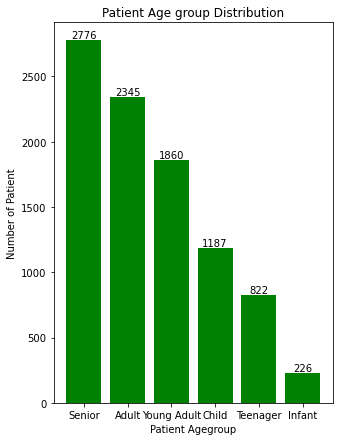

In [22]:

#'Patient Age group'

ag= df["Patient Agegroup"].value_counts()

for p, v in ag.items():
    percnt = round(v / len(df) * 100)
    
    print(p + ": " + str(percnt) + "%")



# Plotting
plt.figure(figsize=(5, 7))
bars = plt.bar(ag.index, ag.values, color="green")
plt.xlabel("Patient Agegroup")
plt.ylabel("Number of Patient")
plt.title("Patient Age group Distribution")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom")


plt.show()

In [23]:
df["Patient Admission Date"] = pd.to_datetime(df['Patient Admission Date'], format='%d/%m/%Y %H:%M')

# Extract month name, day of the week, and hour
df["MonthName"] = df["Patient Admission Date"].dt.strftime('%B')
df["DayOfWeek"] = df["Patient Admission Date"].dt.day_name()
df["Hour"] = df["Patient Admission Date"].dt.hour
df["Year"] = df["Patient Admission Date"].dt.year

df.head()

,Patient Id,Patient Admission Date,Patient First Inital,Patient Last Name,Patient Gender,Patient Age,Patient Race,Department Referral,Patient Admission Flag,Patient Satisfaction Score,Patient Waittime,Patients CM,Patient Agegroup,MonthName,DayOfWeek,Hour,Year
0,145-39-5406,2024-03-20 08:47:00,H,Glasspool,M,69,White,None,False,10.0,39,0,Senior,March,Wednesday,8,2024
1,316-34-3057,2024-06-15 11:29:00,X,Methuen,M,4,Native American/Alaska Native,None,True,10.0,27,0,Child,June,Saturday,11,2024
2,897-46-3852,2024-06-20 09:13:00,P,Schubuser,F,56,African American,General Practice,True,9.0,55,0,Senior,June,Thursday,9,2024
3,358-31-9711,2024-02-04 22:34:00,U,Titcombe,F,24,Native American/Alaska Native,General Practice,True,8.0,31,0,Young Adult,February,Sunday,22,2024
4,289-26-0537,2024-09-04 17:48:00,Y,Gionettitti,M,5,African American,Orthopedics,False,8.0,10,0,Child,September,Wednesday,17,2024


## Question 1
### How do wait times vary by department and age group?

Departmental referrals: ['None', 'General Practice', 'Orthopedics', 'Gastroenterology', 'Physiotherapy', 'Neurology', 'Cardiology', 'Renal']
Their respective average patient wait time (in minutes) [35, 35, 35, 36, 37, 37, 35, 35]


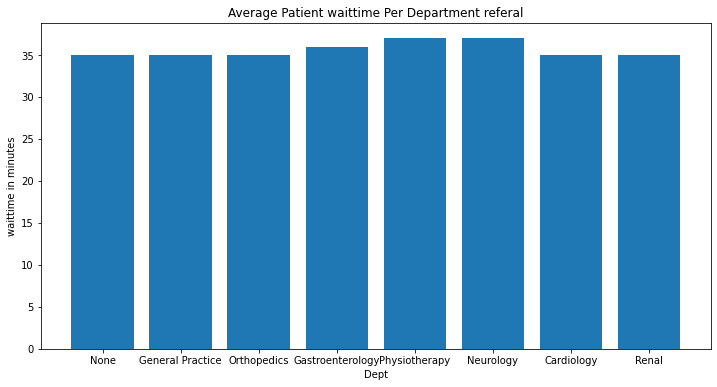

In [24]:
#Average wait time by department


Dept = []
waittime = []



for dept in df["Department Referral"].unique():
    df_dept = df[df["Department Referral"] == dept]
    
    mean_waittime = round(df_dept['Patient Waittime'].mean())
    
    Dept.append(dept)
    waittime.append(mean_waittime)
    
print("Departmental referrals:", Dept)  
print("Their respective average patient wait time (in minutes)", waittime)



plt.figure(figsize=(12, 6))
plt.bar(Dept, waittime)
plt.title("Average Patient waittime Per Department referal")
plt.xlabel("Dept")
plt.ylabel("waittime in minutes")
plt.show()  

The Patient Ages can be grouped into: ['Senior', 'Child', 'Young Adult', 'Adult', 'Teenager', 'Infant']
Their respective mean waittime are [35, 36, 36, 35, 35, 33]


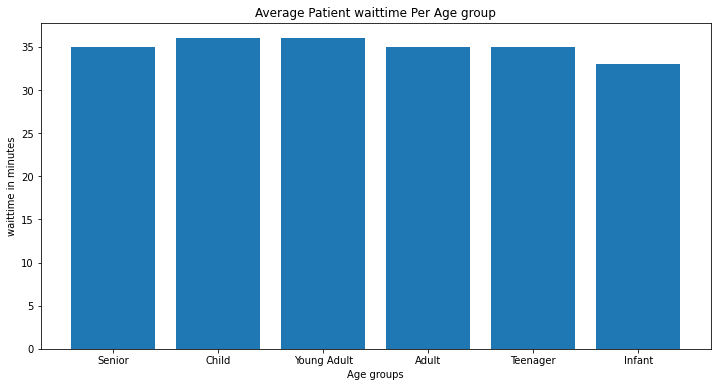

In [25]:

Agegroup = []
Waittime = []



for age in df["Patient Agegroup"].unique():
    df_age = df[df["Patient Agegroup"] == age]
    mean_Waittime = round(df_age['Patient Waittime'].mean())
    
    Agegroup.append(age)
    Waittime.append(mean_Waittime)
    
print("The Patient Ages can be grouped into:", Agegroup)  
print("Their respective mean waittime are", Waittime)



plt.figure(figsize=(12, 6))
plt.bar(Agegroup, Waittime)
plt.title("Average Patient waittime Per Age group")
plt.xlabel("Age groups")
plt.ylabel("waittime in minutes")
plt.show() 

In [26]:
data_2 =(df.groupby(["Department Referral"])['Patient Agegroup'].value_counts()).sort_values(ascending=False)
data_2

Department Referral  Patient Agegroup
None                 Senior              1603
                     Adult               1409
                     Young Adult         1096
                     Child                700
General Practice     Senior               592
                     Adult                459
None                 Teenager             456
General Practice     Young Adult          359
Orthopedics          Senior               281
                     Adult                244
General Practice     Child                231
Orthopedics          Young Adult          209
General Practice     Teenager             158
Orthopedics          Child                136
None                 Infant               136
Orthopedics          Teenager              96
Physiotherapy        Senior                89
Cardiology           Senior                79
Physiotherapy        Adult                 58
Gastroenterology     Senior                58
Neurology            Senior               

## Question 2
### Are patients with higher wait times less likely to report satisfaction?

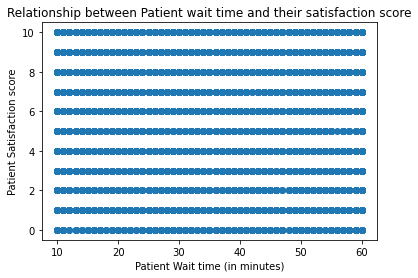

The Correlation Coefficient between Patient wait time and Satisfaction rate is: -0.01858781860252875


In [27]:
#Plotting scatter plot to show relationship between Patient wait time and satisfaction rate

plt.scatter(df["Patient Waittime"], df["Patient Satisfaction Score"])
plt.xlabel("Patient Wait time (in minutes)")
plt.ylabel("Patient Satisfaction score")
plt.title("Relationship between Patient wait time and their satisfaction score")
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient, _ = pearsonr(df["Patient Waittime"], df["Patient Satisfaction Score"])
print("The Correlation Coefficient between Patient wait time and Satisfaction rate is:", correlation_coefficient)

## Question 3 

### Which demographic is most frequently referred to specific departments?

In [28]:
data_1 = df.groupby(["Department Referral", "Patient Race", "Patient Agegroup"])['Patient Gender'].value_counts()
max_counts = data_1.groupby('Department Referral').idxmax()
max_data_1 = data_1.loc[max_counts]
print(max_data_1)

Department Referral  Patient Race      Patient Agegroup  Patient Gender
Cardiology           White             Senior            F                  14
Gastroenterology     African American  Child             F                   9
General Practice     White             Senior            F                  84
Neurology            White             Young Adult       F                   8
None                 White             Senior            M                 237
Orthopedics          White             Senior            M                  52
Physiotherapy        White             Senior            F                  15
Renal                White             Adult             F                   8
Name: Patient Gender, dtype: int64


In [29]:
for c in df["Department Referral"].unique():
    dept_df = df[df["Department Referral"] == c]
    
    Race = dept_df["Patient Race"].value_counts().sort_values(ascending=False).index[0]
    Gender = dept_df["Patient Gender"].value_counts().sort_values(ascending=False).index[0]
    AgeGroup = dept_df["Patient Agegroup"].value_counts().sort_values(ascending=False).index[0] 
  
    print("The demographic that is most frequently referred to ", c," is: " + Race + " " + Gender + " " + AgeGroup)


The demographic that is most frequently referred to  None  is: White M Senior
The demographic that is most frequently referred to  General Practice  is: White M Senior
The demographic that is most frequently referred to  Orthopedics  is: White M Senior
The demographic that is most frequently referred to  Gastroenterology  is: White F Senior
The demographic that is most frequently referred to  Physiotherapy  is: White F Senior
The demographic that is most frequently referred to  Neurology  is: White F Senior
The demographic that is most frequently referred to  Cardiology  is: White M Senior
The demographic that is most frequently referred to  Renal  is: White M Adult


 Question 4
### What are the busiest periods in the ER?

In [37]:
#Subsetting related columns

dfSub = df.loc[0:9216, ["Patient Admission Date", "Hour", "DayOfWeek", "MonthName", "Year"]]

#Calcullating number of patients in the ER per hour

hour = dfSub["Hour"].value_counts().sort_index()
#hour

#Visualization showing the busiest hour:

plt.figure(figsize=(12, 5))
sns.lineplot(data=dfSub, x=hour.index, y=hour.values, hue='yellow', alpha=0.8, linewidth=2)#plt.plot(hour.index,hour.values)
plt.xticks(hour.index)
plt.xlabel("Hours of the day")
plt.ylabel("Total Number of Patients")
plt.title("Number of Patients in the ER per hour")
plt.show()

ValueError: Length of Int64Index vectors must match length of `data` when both are used, but `data` has length 9216 and the vector passed to `x` has length 24.

<Figure size 864x360 with 0 Axes>

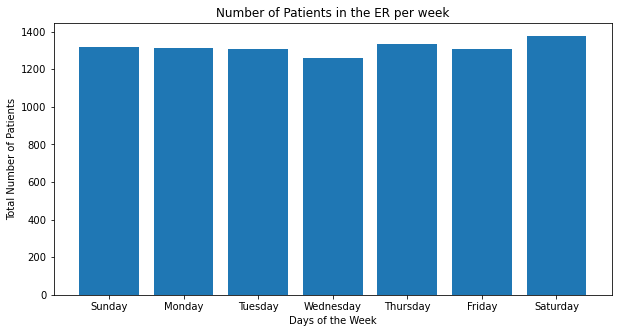

In [31]:
#Calcullating number of patients in the ER weekly


# Ensure your 'DayOfWeek' column is a categorical type with the desired order
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
dfSub['DayOfWeek'] = pd.Categorical(dfSub['DayOfWeek'], categories=day_order, ordered=True)

# Count the values and sort by the day order
day = dfSub['DayOfWeek'].value_counts().sort_index()


#Visualization showing the busiest day of the week:

plt.figure(figsize=(10, 5))
plt.bar(day.index, day.values)
plt.xlabel("Days of the Week")
plt.ylabel("Total Number of Patients")
plt.title("Number of Patients in the ER per week")
plt.show() 



January       513
February      431
March         506
April         948
May           999
June          991
July          952
August       1024
September     935
October       964
November      464
December      489
Name: MonthName, dtype: int64


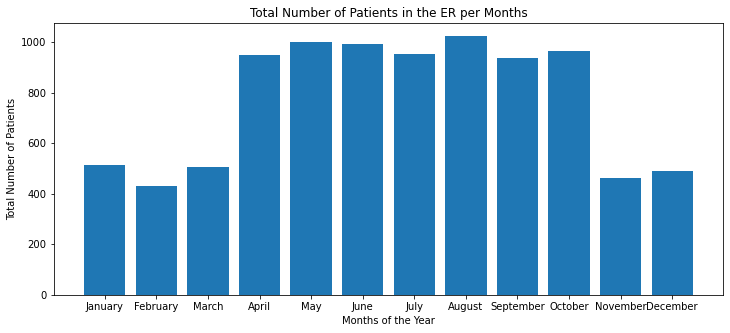

In [32]:
#Calcullating number of patients in the ER monthly


# Ensure your 'DayOfWeek' column is a categorical type with the desired order
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dfSub["MonthName"] = pd.Categorical(dfSub["MonthName"], categories=month_order, ordered=True)

# Count the values and sort by the day order

month = dfSub['MonthName'].value_counts().sort_index()
print(month)

#Visualization showing the busiest month of the year:

plt.figure(figsize=(12, 5))
plt.bar(month.index,month.values)
plt.xlabel("Months of the Year")
plt.ylabel("Total Number of Patients")
plt.title("Total Number of Patients in the ER per Months")
plt.show()  


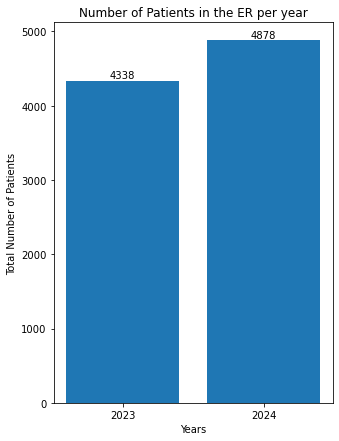

In [33]:
#Calcullating number of patients in the ER in the years

year = dfSub["Year"].value_counts().sort_index()

#Visualization showing the busiest day of the week:

plt.figure(figsize=(5, 7))
bars = plt.bar(year.index, year.values)
plt.xlabel("Years")
plt.xticks(year.index) 
plt.ylabel("Total Number of Patients")
plt.title("Number of Patients in the ER per year")

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom")


plt.show()

## Summary / Data Storytelling

The ER data records 9216 cases of patients from 1st January 2023 to 30th October 2024, most of whom are adults, Whites and African Americans. There are slightly more male than female (51 and 49 percent respectfully) with age range 1-79. The demography also includes Asians (12%), Pacific Islanders (6%), Native Americans/Alaska Native (5%), patients of two or more races (17%), as well as those who have declined to identify (11%).  

Patients that come into the ER typically spend 35 minutes from when they check in or are triaged until they receive an initial medical evaluation or treatment. However, they can spend up to an hour waiting. Depending on the patient's age group and the department to which they are referred, there may be a variation of plus or minus 2 minutes, contingent upon referral. Though, 3 of 5 patients are discharged right from the ER because they have no need to be referred to a specialty, and 1 requires critical health management after the ER visit, all 5 have equal chances of being admitted (or not). 

African American children within 3 and 12 years mostly treat gastroenterology related illnesses, and White Adults and young adults within ages 36-55 and 20-35 is mostly referred to Renal and Neurology department respectively. While a lot of  elderly White men and women more than 55 years are discharged directly from the ER, most frequently treat cardiology, orthopedics, physiotherapy, neurology, and general practice related illnesses. 

The ER is least visited during the winter, and is at its peak just before the end of summer in August. Therefore, winter period is the best time for ER staff developmental programs.

At the end of a visit to the ER, patients’ satisfaction of the experience is almost never affected by the wait time only. Further analysis (Feature Selection Process) can be carried out to determine other factors that influence patients’ satisfaction score. However, it is crucial to reduce patients wait time to the barest minimum by keeping track of the busiest periods and matching up with adequate staff to properly care for patients. Finally, hospital policies on doctor to patient ratio and employment of ER staff may be reviewed to reduce work load and  less burnout which improves patients care and experience in the ER and ultimately patients satisfaction score. 



## Stay Tuned....!